<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/ANN_trial_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, \
  GlobalAveragePooling1D, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Concatenate, Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D,Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
df = pd.read_csv('GT data for 3-hour intervel learning1_without_temp_selected_screened.csv'
        )


In [3]:

df["LogSpread1"] = np.log(df['Combust Monitor Actual Spread 1'])
df['DiffLogSpread1'] = df['LogSpread1'].diff()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date_Time                        2858 non-null   object 
 1   Combust Monitor Actual Spread 1  2858 non-null   float64
 2   GT Exhaust Outlet Temp           2858 non-null   float64
 3   GT Exhaust Outlet temp Expected  2858 non-null   float64
 4   Combust Monitor Actual Spread 3  2858 non-null   float64
 5   GT Exhaust Outlet temp Average   2858 non-null   float64
 6   GT Swirl Angle                   2858 non-null   float64
 7   GT Efficiency Actual (LHV)       2858 non-null   float64
 8   Turbine Speed in RPM             2858 non-null   float64
 9   GT Compres Disch Press           2858 non-null   float64
 10  GT Fuel Gas Mass Flow            2858 non-null   float64
 11  GT IGV Position                  2858 non-null   float64
 12  GT Turbine Inlet Tem

In [5]:
#input_data = df[['GT Exhaust Outlet Temp', 'GT Exhaust Outlet temp Expected',
                 #'Combust Monitor Actual Spread 3', 'GT Exhaust Outlet temp Average',
                 # 'GT Swirl Angle', 'GT Exhaust Outlet Temp',
                 # 'GT Efficiency Actual (LHV)','Turbine Speed in RPM',
                 # 'GT Compres Disch Press','GT Fuel Gas Mass Flow','GT IGV Position',
                 # 'GT Turbine Inlet Temp','GT Gross MW' ]].values

#targets =df['Combust Monitor Actual Spread 1'].values

In [6]:
Ntest = 21
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [7]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['DiffLogSpread1']])
test_scaled = scaler.transform(test[['DiffLogSpread1']])



In [8]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [9]:
df.loc[train_idx, 'DiffLogSpread1'] = train_scaled.flatten()
df.loc[test_idx, 'DiffLogSpread1'] = test_scaled.flatten()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date_Time                        2858 non-null   object 
 1   Combust Monitor Actual Spread 1  2858 non-null   float64
 2   GT Exhaust Outlet Temp           2858 non-null   float64
 3   GT Exhaust Outlet temp Expected  2858 non-null   float64
 4   Combust Monitor Actual Spread 3  2858 non-null   float64
 5   GT Exhaust Outlet temp Average   2858 non-null   float64
 6   GT Swirl Angle                   2858 non-null   float64
 7   GT Efficiency Actual (LHV)       2858 non-null   float64
 8   Turbine Speed in RPM             2858 non-null   float64
 9   GT Compres Disch Press           2858 non-null   float64
 10  GT Fuel Gas Mass Flow            2858 non-null   float64
 11  GT IGV Position                  2858 non-null   float64
 12  GT Turbine Inlet Tem

In [10]:
# Make supervised dataset
series = df['DiffLogSpread1'].dropna().to_numpy()

T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2847, 10) Y.shape (2847,)


In [11]:
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [12]:
# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

In [13]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [14]:
r = model.fit(
  Xtrain,
  Ytrain,
  epochs=200,
  validation_data=(Xtest, Ytest)
)

Epoch 1/200
89/89 [==============================] - 6s 4ms/step - loss: 0.9263 - val_loss: 0.6565
Epoch 2/200
89/89 [==============================] - 0s 2ms/step - loss: 0.7870 - val_loss: 0.5959
Epoch 3/200
89/89 [==============================] - 0s 2ms/step - loss: 0.7312 - val_loss: 0.5450
Epoch 4/200
89/89 [==============================] - 0s 2ms/step - loss: 0.6989 - val_loss: 0.5442
Epoch 5/200
89/89 [==============================] - 0s 2ms/step - loss: 0.6791 - val_loss: 0.5437
Epoch 6/200
89/89 [==============================] - 0s 2ms/step - loss: 0.6658 - val_loss: 0.5379
Epoch 7/200
89/89 [==============================] - 0s 2ms/step - loss: 0.6565 - val_loss: 0.5317
Epoch 8/200
89/89 [==============================] - 0s 2ms/step - loss: 0.6486 - val_loss: 0.5387
Epoch 9/200
89/89 [==============================] - 0s 2ms/step - loss: 0.6429 - val_loss: 0.5272
Epoch 10/200
89/89 [==============================] - 0s 2ms/step - loss: 0.6376 - val_loss: 0.5277
Epoch 11/

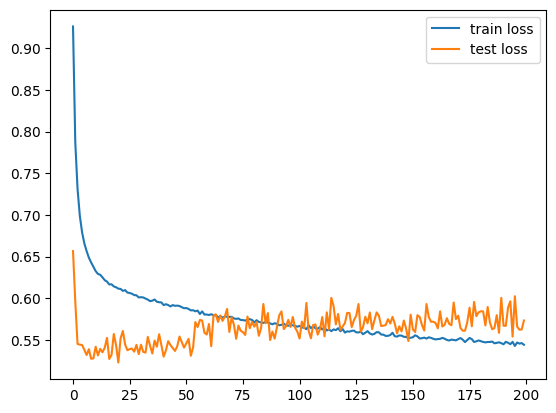

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [16]:
train_idx[:T+1] = False # first T+1 values are not predictable

In [17]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()

1/1 [==============================] - 0s 18ms/step


In [18]:
# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

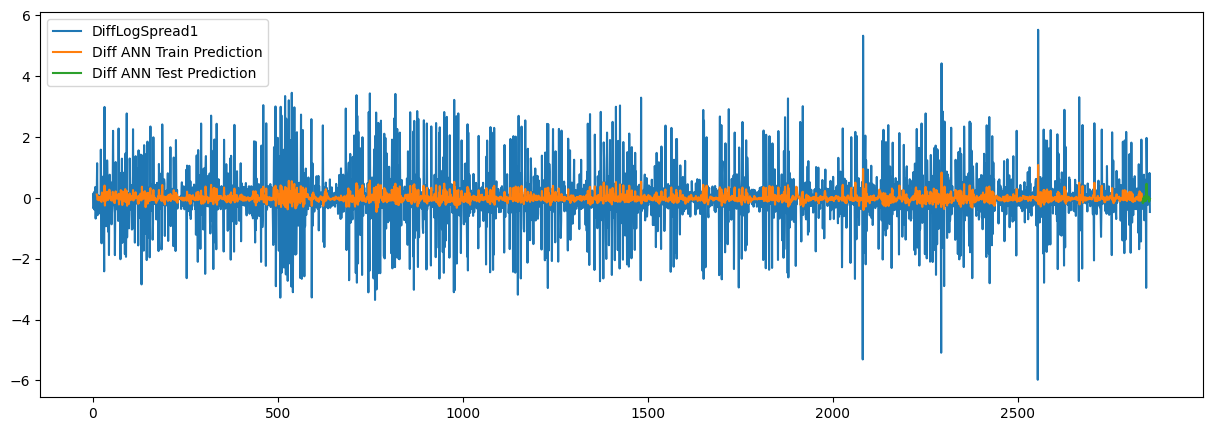

In [19]:
cols = ['DiffLogSpread1',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));


In [20]:
# Needed to compute un-differenced predictions
df['ShiftLogSpread1'] = df['LogSpread1'].shift(1)
prev = df['ShiftLogSpread1']

In [21]:
# Last-known train value
last_train = train.iloc[-1]['LogSpread1']

last_train

3.347656714700787

In [22]:
# 1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest
df.tail(20)

,Date_Time,Combust Monitor Actual Spread 1,GT Exhaust Outlet Temp,GT Exhaust Outlet temp Expected,Combust Monitor Actual Spread 3,GT Exhaust Outlet temp Average,GT Swirl Angle,GT Efficiency Actual (LHV),Turbine Speed in RPM,GT Compres Disch Press,...,GT IGV Position,GT Turbine Inlet Temp,GT Gross MW,LogSpread1,DiffLogSpread1,Diff ANN Train Prediction,Diff ANN Test Prediction,ShiftLogSpread1,1step_train,1step_test
2838,08/31/2023 19:50:02,28.533432,621.012512,603.415527,23.291,621.012512,38.869789,33.817608,3000.517578,1469.302368,...,88.010277,1245.601929,206.802475,3.351076,-0.009709,NaN,-0.177020,3.353035,NaN,3.176014
2839,9/1/2023 10:50,26.894201,621.205078,603.320618,18.939,621.205078,40.159985,33.861732,3001.692871,1449.478394,...,86.748344,1246.080078,205.891602,3.291911,-0.297924,NaN,-0.016908,3.351076,NaN,3.334168
2840,9/1/2023 13:50,27.818069,627.786011,601.830078,20.854,627.786011,36.979374,33.895557,3000.214844,1476.870239,...,88.022690,1256.996826,208.778381,3.325686,0.170318,NaN,-0.086735,3.291911,NaN,3.205176
2841,9/1/2023 16:50,32.345928,638.012634,608.127319,20.409,638.012634,49.578156,34.480431,3001.495850,1301.824951,...,71.152260,1263.145508,195.777084,3.476488,0.759908,NaN,0.040105,3.325686,NaN,3.365791
2842,9/1/2023 19:50,27.941422,625.840393,600.411560,23.525,625.840393,37.652462,34.815487,3002.219238,1447.024048,...,81.339195,1260.756104,208.092453,3.330110,-0.737305,NaN,-0.122178,3.476488,NaN,3.354310
2843,9/2/2023 10:50,31.485344,629.432556,601.899597,29.269,629.432556,33.377460,33.817364,3000.242188,1485.679321,...,88.000710,1258.918579,212.585220,3.449522,0.601761,NaN,0.043202,3.330110,NaN,3.373312
2844,9/2/2023 13:50,31.581921,632.580200,603.962952,17.341,632.580200,41.711182,34.441990,3002.449707,1376.909790,...,77.497849,1261.282104,203.898453,3.452585,0.015586,NaN,-0.067855,3.449522,NaN,3.381668
2845,9/2/2023 16:50,31.838549,628.037476,601.637878,23.032,628.037476,36.349976,33.791008,2998.249512,1475.804443,...,87.992142,1254.733521,209.430573,3.460678,0.040929,NaN,-0.057535,3.452585,NaN,3.395050
2846,9/2/2023 19:50,31.489775,625.072876,601.718506,23.433,625.072876,36.055630,33.934765,2999.759277,1477.319214,...,88.001495,1253.083252,209.614838,3.449663,-0.055337,NaN,-0.103384,3.460678,NaN,3.357293
2847,9/2/2023 22:50,17.505693,601.275574,643.096069,11.354,601.275574,159.217575,22.582914,2998.231934,812.716065,...,42.041237,1015.492737,60.320221,2.862526,-2.957875,NaN,-0.047428,3.449663,NaN,3.402234


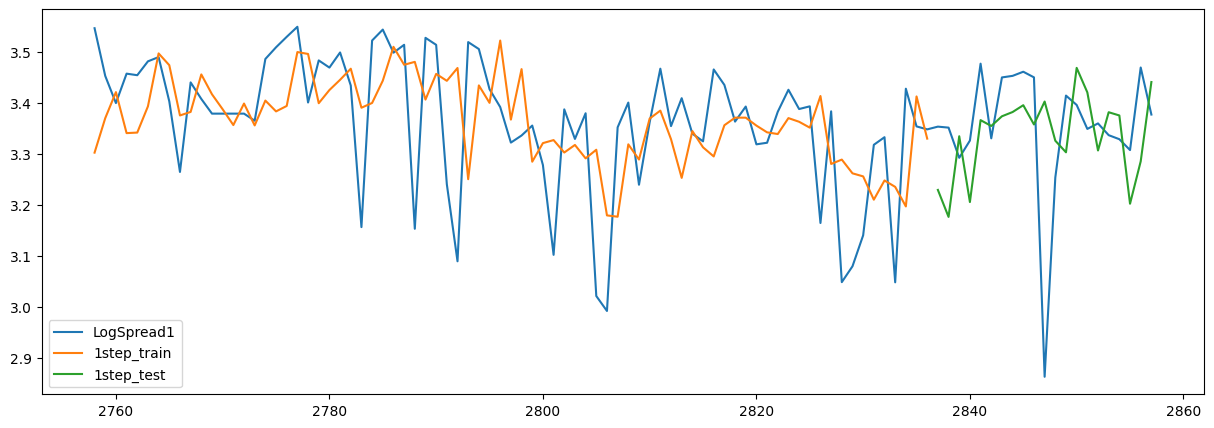

In [23]:
# plot 1-step forecast
df.iloc[-100:][['LogSpread1', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [24]:
# multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1, -1))[0]

  # update the predictions list
  multistep_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 17ms/step


In [25]:
# unscale
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(
    multistep_predictions.reshape(-1, 1)).flatten()

In [26]:
# save multi-step forecast to dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

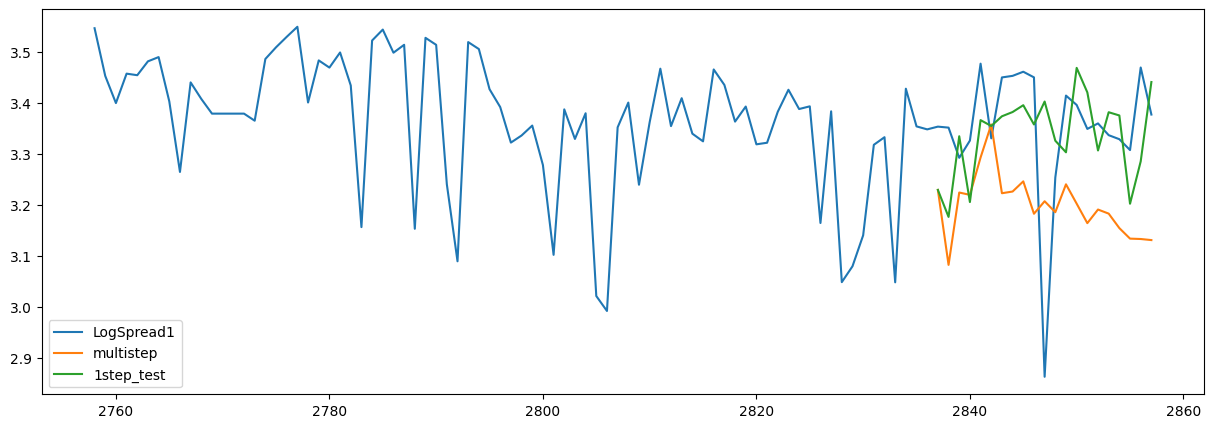

In [27]:
# plot 1-step and multi-step forecast
df.iloc[-100:][['LogSpread1', 'multistep', '1step_test']].plot(figsize=(15, 5));

In [28]:
# make multi-output supervised dataset
Tx = T
Ty = Ntest
X = []
Y = []
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2827, 10) Y.shape (2827, 21)


In [29]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [30]:
# Basic ANN
i = Input(shape=(Tx,))
x = Dense(32, activation='relu')(i)
x = Dense(Ty)(x)
model = Model(i, x)

In [31]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [32]:
r = model.fit(
  Xtrain_m,
  Ytrain_m,
  epochs=100,
  validation_data=(Xtest_m, Ytest_m)
)

Epoch 1/100
89/89 [==============================] - 1s 3ms/step - loss: 1.1678 - val_loss: 0.8086
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 1.0511 - val_loss: 0.7993
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 1.0236 - val_loss: 0.8040
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 1.0109 - val_loss: 0.8134
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 1.0029 - val_loss: 0.8093
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 0.9974 - val_loss: 0.8048
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 0.9930 - val_loss: 0.8008
Epoch 8/100
89/89 [==============================] - 0s 2ms/step - loss: 0.9896 - val_loss: 0.7979
Epoch 9/100
89/89 [==============================] - 0s 2ms/step - loss: 0.9867 - val_loss: 0.7968
Epoch 10/100
89/89 [==============================] - 0s 2ms/step - loss: 0.9843 - val_loss: 0.7905
Epoch 11/

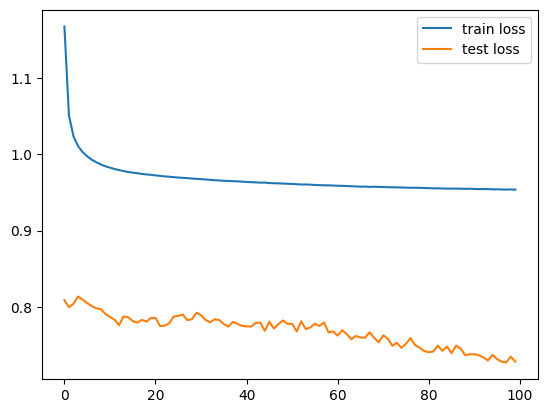

In [33]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [34]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

1/1 [==============================] - 0s 17ms/step


In [35]:
Ptrain.shape, Ptest.shape

((2826, 21), (21, 21))

In [36]:
Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

In [37]:
# unscale
Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [38]:
# save multi-output forecast to dataframe
df.loc[test_idx, 'multioutput'] = last_train + \
  np.cumsum(Ptest)

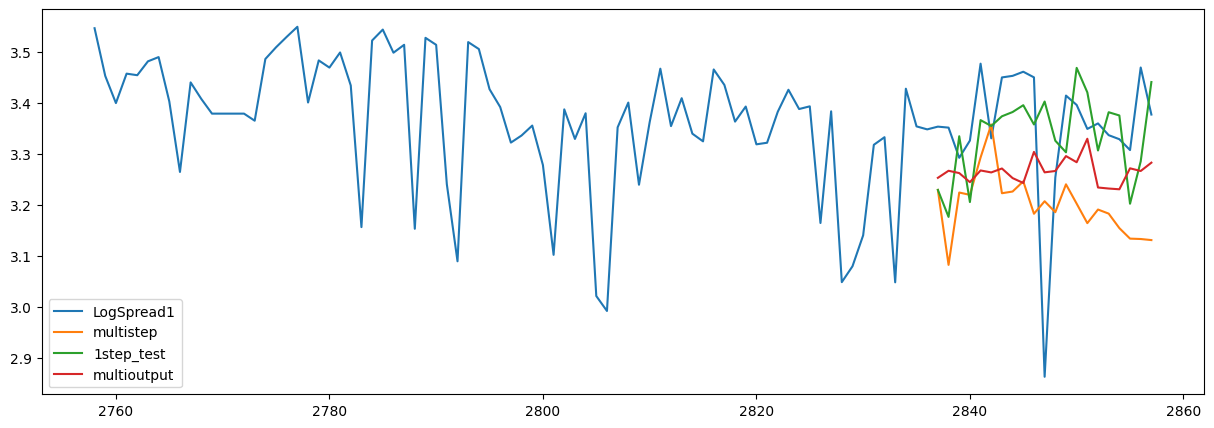

In [39]:
# plot all forecasts
cols = ['LogSpread1', 'multistep', '1step_test', 'multioutput']
df.iloc[-100:][cols].plot(figsize=(15, 5));

In [40]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogSpread1']
mape1 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.05607710734832037
multi-output MAPE: 0.03797483222735458
